In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.pyplot import imread

In [3]:
from random import shuffle, random
import cv2
from skimage import exposure
from tqdm import tqdm

In [4]:
data_dir = 'data/data2'

In [5]:
colnames = ['center_img', 'left_img', 'right_img', 'steering_angle', 'throttle', 'break', 'speed']
driving_log_pd = pd.read_csv('%s/driving_log.csv' % data_dir, sep=',', 
                            names=colnames)
driving_log_pd.loc[:100]

center_img  \
0    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
1    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
2    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
3    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
4    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
5    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
6    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
7    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
8    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
9    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
10   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
11   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
12   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
13   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
14   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
15   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
16   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
17   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
18   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
19   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
20   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
21   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
22   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
23   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
24   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
25   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
26   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
27   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
28   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
29   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
..                                                 ...   
71   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
72   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
73   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
74   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
75   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
76   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
77   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
78   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
79   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
80   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
81   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
82   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
83   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
84   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
85   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
86   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
87   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
88   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
89   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
90   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
91   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
92   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
93   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
94   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
95   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
96   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
97   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
98   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
99   /Users/phillipcchin/work/CarND-Behavioral-Clon...   
100  /Users/phillipcchin/work/CarND-Behavioral-Clon...   

                                              left_img  \
0    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
1    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
2    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
3    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
4    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
5    /Users/phillipcchin/work/CarND-Behavioral-Clon...   
6    /Users/phillipcchin/work/CarND-Behav

In [6]:
def parse_file_name(full_path):
    if '/' in full_path:
        return full_path.split('/')[-1]
    else:
        return full_path

In [7]:
for colname in ['center_img', 'left_img', 'right_img']:
    driving_log_pd[colname] = [parse_file_name(x) for x in driving_log_pd[colname].tolist()]

driving_log_pd.head()

center_img                          left_img  \
0  center_2018_01_22_19_22_53_312.jpg  left_2018_01_22_19_22_53_312.jpg   
1  center_2018_01_22_19_22_53_419.jpg  left_2018_01_22_19_22_53_419.jpg   
2  center_2018_01_22_19_22_53_517.jpg  left_2018_01_22_19_22_53_517.jpg   
3  center_2018_01_22_19_22_53_589.jpg  left_2018_01_22_19_22_53_589.jpg   
4  center_2018_01_22_19_22_53_690.jpg  left_2018_01_22_19_22_53_690.jpg   

                           right_img  steering_angle  throttle  break  \
0  right_2018_01_22_19_22_53_312.jpg             0.0       0.0    0.0   
1  right_2018_01_22_19_22_53_419.jpg             0.0       0.0    0.0   
2  right_2018_01_22_19_22_53_517.jpg             0.0       0.0    0.0   
3  right_2018_01_22_19_22_53_589.jpg             0.0       0.0    0.0   
4  right_2018_01_22_19_22_53_690.jpg             0.0       0.0    0.0   

      speed  
0  5.544637  
1  5.489003  
2  5.433926  
3  5.390263  
4  5.336177

In [8]:
def display_images(X, start_idx=0, end_idx=None, 
                       columns = 5, use_gray=False, apply_fnc=None):
    if end_idx is None:
        end_idx = X.shape[0]
        
    if apply_fnc is None:
        apply_fnc = lambda image: image
        
    plt.figure(figsize=(32,18))

    num_of_images = end_idx - start_idx
    rows = num_of_images / columns + 1
    
    for i in range(start_idx, end_idx):
        image = X[i]
        
        _i = i % num_of_images
        plt.subplot(rows, columns, _i + 1)
        
        if use_gray:
            plt.imshow(apply_fnc(image), cmap="gray")
        else:
            plt.imshow(apply_fnc(image)) 
            
    plt.tight_layout()
            
    plt.show()

In [9]:
img_dir = '%s/IMG' % data_dir

In [86]:
def read_imgs(img_dir, file_names):
    img_arr = []
    
    for file_name in file_names:
        img = imread('%s/%s' % (img_dir, file_name))
        img_arr.append(img)
        
    return np.stack(img_arr)

In [11]:
sample_imgs = read_imgs(img_dir, driving_log_pd['center_img'].tolist()[:10])
sample_imgs.shape

100%|██████████| 10/10 [00:00<00:00, 19.44it/s]


(10, 160, 320, 3)

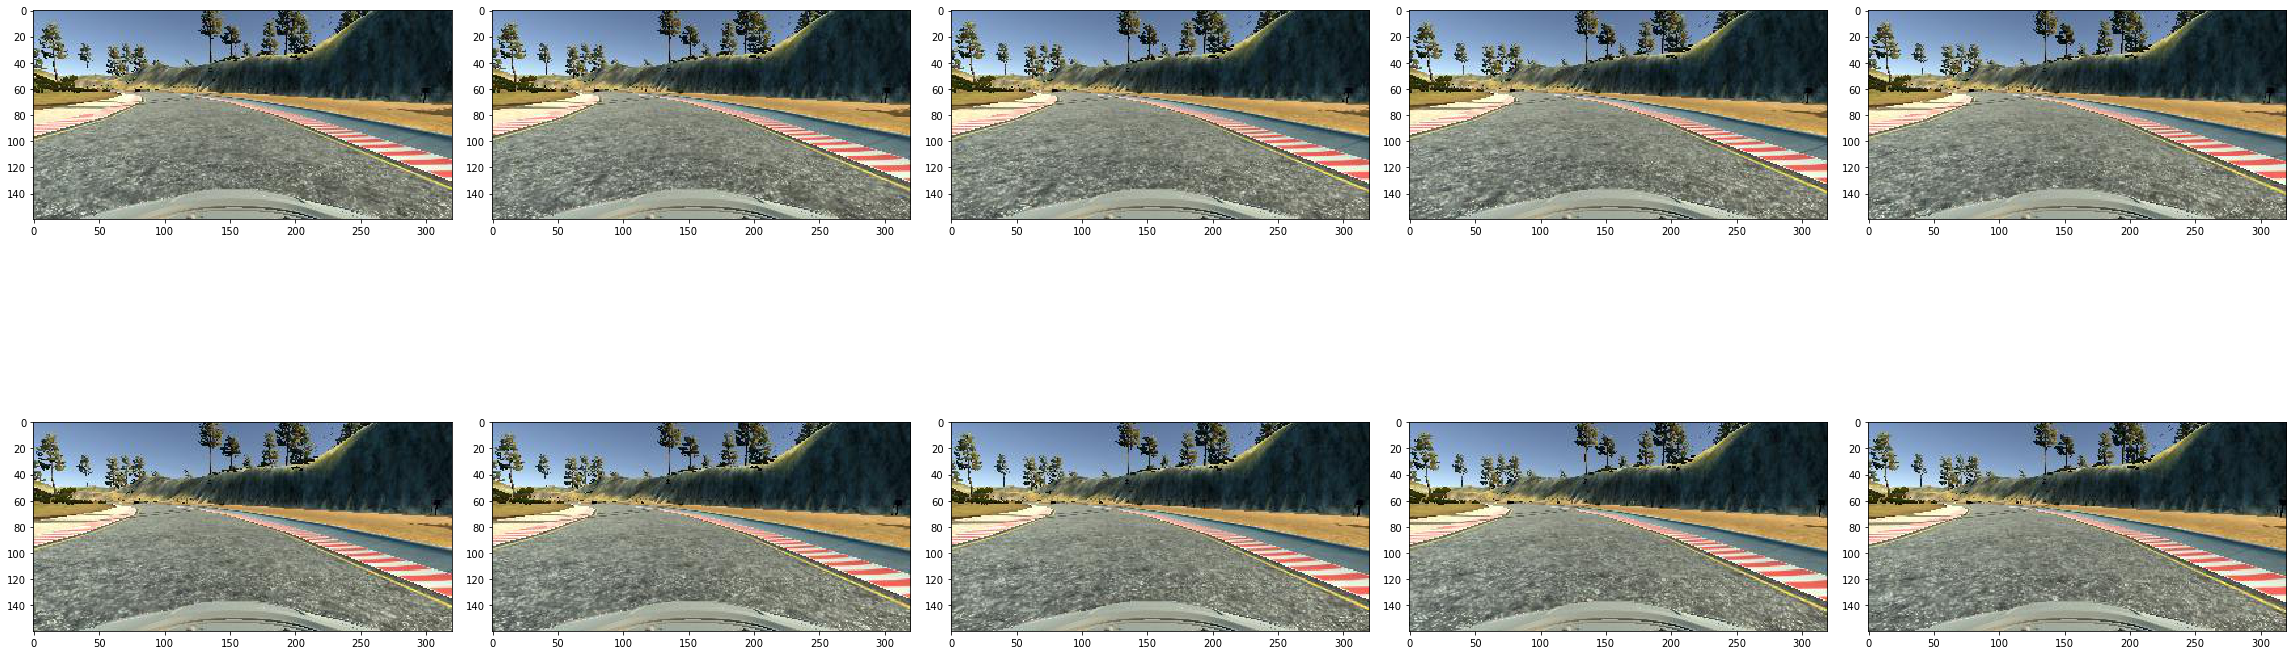

In [12]:
display_images(sample_imgs, columns=5)

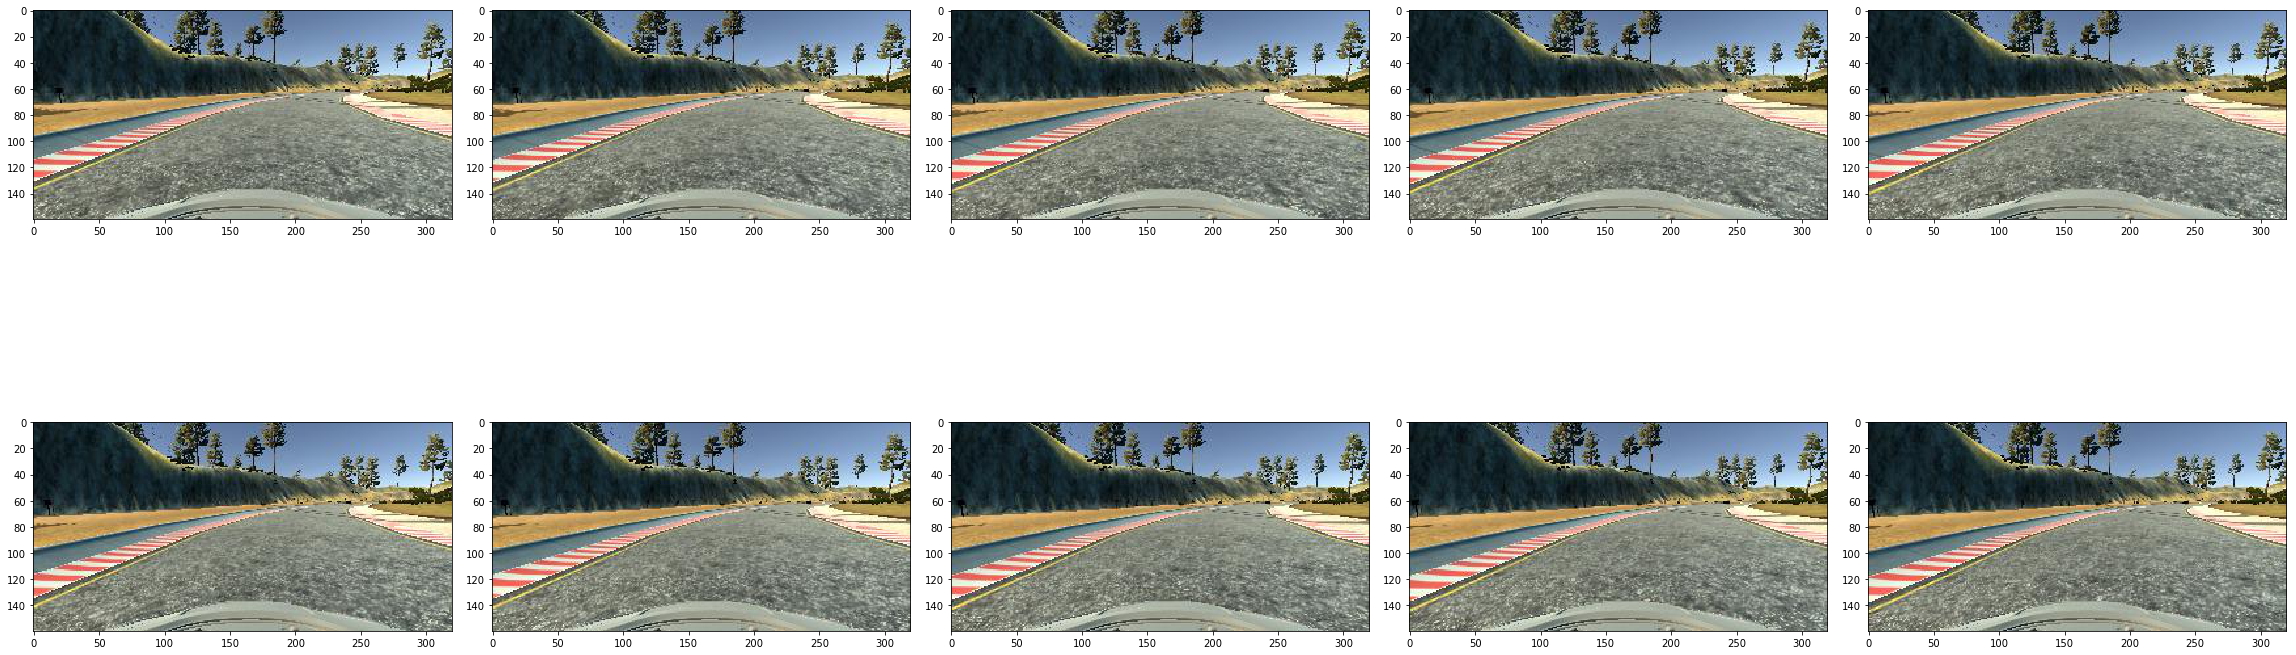

In [13]:
display_images(sample_imgs, columns=5, apply_fnc=np.fliplr)

48 112 64
(64, 320, 3)


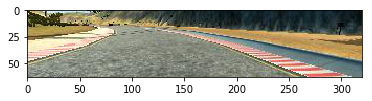

In [109]:
y0 = int(0.3*sample_imgs[0].shape[0])
y1 = sample_imgs[0].shape[0]-int(0.3*sample_imgs[0].shape[0])
print(y0, y1, y1-y0)

cropped_image = sample_imgs[0][y0:y1, :]

print(cropped_image.shape)

plt.imshow(cropped_image)
plt.show()

In [14]:
def apply_histogram_equalization(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    equalized_image = exposure.equalize_adapthist(gray_image)
    
    return (255.0*equalized_image).astype(np.uint8)

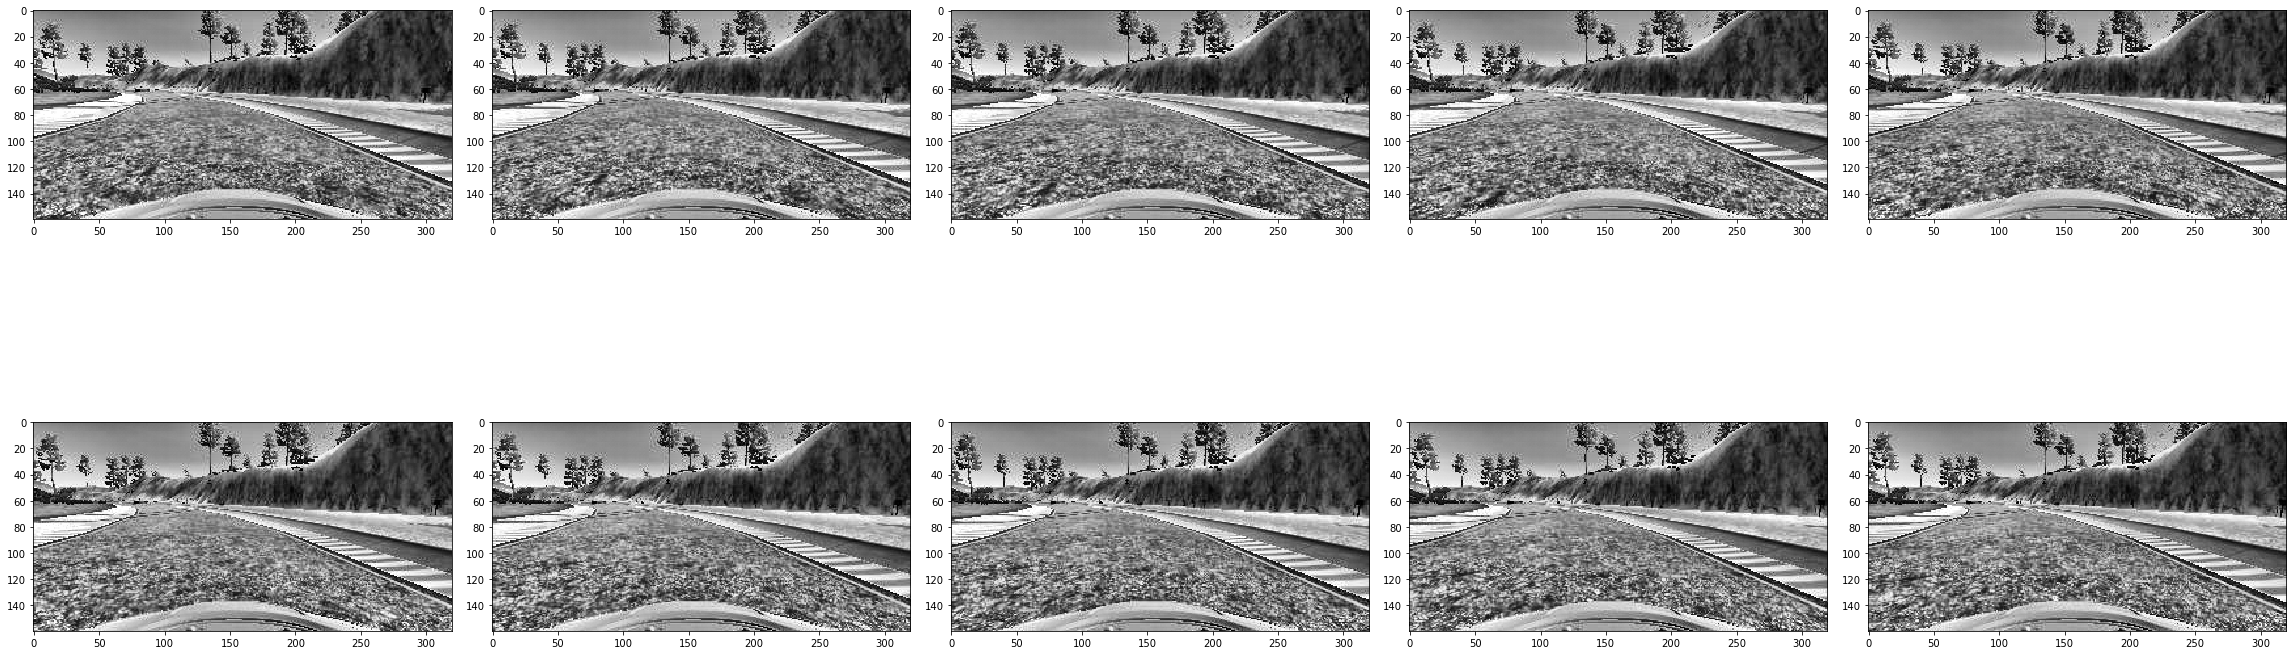

In [15]:
display_images(sample_imgs, columns=5, use_gray=True,
               apply_fnc=apply_histogram_equalization)

## Steering Angles

In [16]:
steering_angles = driving_log_pd['steering_angle'].tolist()

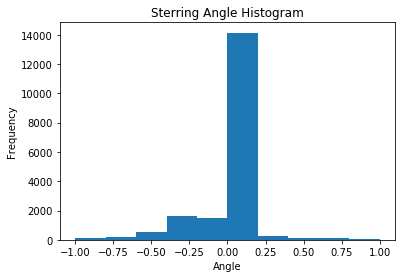

# of bins: 11


In [17]:
n, bins, patches = plt.hist(steering_angles)
plt.title("Sterring Angle Histogram")
plt.xlabel("Angle")
plt.ylabel("Frequency")
plt.show()

print("# of bins: %d" % len(bins))

In [18]:
min(steering_angles), max(steering_angles)

(-1.0, 1.0)

In [19]:
print('minimum frequency: %d' % np.histogram(steering_angles, bins)[0].min())

minimum frequency: 61


## Data

In [20]:
img_steering_pd = driving_log_pd[['center_img', 'steering_angle']]

In [21]:
img_steering_pd['steering_angle'].min(), img_steering_pd['steering_angle'].max()

(-1.0, 1.0)

In [22]:
def smooth_steering_angle(img_steering_pd):
    steering_angles = img_steering_pd['steering_angle'].tolist()
    prior_steering_angles = steering_angles + [0.0, 0.0]
    curr_steering_angles = [0.0] + steering_angles + [0.0]
    next_steering_angles = [0.0, 0.0] + steering_angles

    steering_angles_pd = pd.DataFrame(data={'prior': prior_steering_angles, 
                                           'curr': curr_steering_angles,
                                           'next': next_steering_angles})

    steering_angles_pd['mean_steering_angle'] = steering_angles_pd.mean(numeric_only=True, axis=1)
    steering_angles_pd = steering_angles_pd.iloc[1:-1]
    steering_angles_pd.index = list(range(len(steering_angles_pd.index)))

    _img_steering_pd = pd.concat([img_steering_pd, steering_angles_pd], axis=1)
    _img_steering_pd.head()
    
    _img_steering_pd = _img_steering_pd[['center_img', 'mean_steering_angle']]
    _img_steering_pd.rename(mapper={'mean_steering_angle': 'steering_angle'},
                                    axis='columns', inplace=True)
    
    
    return _img_steering_pd

In [23]:
#_img_steering_pd = smooth_steering_angle(img_steering_pd)
#_img_steering_pd.head()

In [24]:
def split_train_test(img_steering_pd, train_perc=0.7, val_perc=0.2):
    idx_len = len(img_steering_pd.index)
    idxs = list(range(idx_len))
    shuffle(idxs)
    
    idx1 = int(idx_len*train_perc)
    idx2 = idx1 + int(idx_len*val_perc)
    
    train_pd = img_steering_pd.loc[idxs[:idx1]]
    val_pd = img_steering_pd.loc[idxs[idx1:idx2]]
    test_pd = img_steering_pd.loc[idxs[idx2:]]
    
    return train_pd, val_pd, test_pd

In [25]:
#train_pd, val_pd, test_pd = split_train_test(img_steering_pd)
train_pd, val_pd, test_pd = split_train_test(img_steering_pd)
print(len(train_pd.index), len(val_pd.index), len(test_pd.index))

13050 3728 1866


In [26]:
val_pd[pd.isnull(val_pd).any(axis=1)]

Empty DataFrame
Columns: [center_img, steering_angle]
Index: []

In [27]:
_train_pd = train_pd.iloc[:int(1.0*len(train_pd.index))]
_val_pd = val_pd.iloc[:int(1.0*len(val_pd.index))]
_test_pd = test_pd.iloc[:int(1.0*len(test_pd.index))]

In [70]:
X_train_files = _train_pd['center_img'].tolist()
y_train = np.array(_train_pd['steering_angle'])

X_val = read_imgs(img_dir, _val_pd['center_img'].tolist())
y_val = np.array(_val_pd['steering_angle'])
X_test = read_imgs(img_dir, _test_pd['center_img'].tolist())
y_test = np.array(_test_pd['steering_angle'])

100%|██████████| 1866/1866 [00:08<00:00, 211.25it/s]


In [68]:
X_train.shape

(13050, 160, 320, 3)

## Model

In [30]:
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dense, Lambda, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [31]:
from keras import backend as K

In [32]:
import keras
keras.__version__

'1.2.1'

In [33]:
import tensorflow as tf
tf.__version__

'0.12.1'

In [34]:
batch_size=32
p = 0.5

In [110]:
offset_height = 48 
target_height = 64
offset_width = 0 
target_width = 320

In [122]:
model = Sequential()
model.add(Lambda(lambda x: x, input_shape=(160,320,3)))

"""
model.add(Lambda(lambda x: K.tf.concat([K.tf.image.pad_to_bounding_box(image, offset_height, offset_width, 
                                target_height, target_width) for image in K.tf.unstack(x)], 0)))
"""
model.add(Lambda(lambda x: K.tf.concat(0, [image for image in K.tf.unstack(x, num=batch_size)])))

                            
model.add(Lambda(lambda x: K.tf.image.rgb_to_grayscale(x)))
model.add(Lambda(lambda x: x / 255.0 - 0.5))
#model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))

# block 1
model.add(Conv2D(8, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(Conv2D(8, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode='same'))
#model.add(Dropout(p))

# block 2
model.add(Conv2D(16, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(Conv2D(16, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode='same'))
#model.add(Dropout(p))

# block 3
model.add(Conv2D(32, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(Conv2D(32, nb_row=3, nb_col=3, subsample=(1, 1), border_mode='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode='same'))
#model.add(Dropout(p))
          
model.add(Flatten())          
 
model.add(Dense(64, activation=None))
model.add(Dropout(p))
model.add(Activation('relu'))
model.add(Dense(1))

ValueError: Input 0 is incompatible with layer convolution2d_13: expected ndim=4, found ndim=3

In [100]:
from sklearn.utils import shuffle as shuffle_X_y

In [101]:
def image_gen(X_files, y, batch_size, img_dir, flip_perc=0.5): 
    X_len = len(X_files)
    idxs = list(range(X_len))
    
    while True:
        shuffle(idxs)
        y = y[idxs]
        X_files = [X_files[i] for i in idxs]
        
        for i in range(0, X_len, batch_size):
            end_idx = i+batch_size
            
            if end_idx > X_len:
                continue   
  
            curr_y = y[i:end_idx]
            curr_X_files = X_files[i:end_idx]
            curr_X = read_imgs(img_dir, curr_X_files)

            """
            for j in range(curr_X.shape[0]):
                if random() > flip_perc:
                    curr_X[j] = np.fliplr(curr_X[j])
                    curr_y[j] = -1.0 * curr_y[j]
            """
                    
            yield curr_X, curr_y

In [102]:
lr=0.00001
nb_epoch=10

optimizer = Adam(lr=lr)
model.compile(loss='mse', optimizer=optimizer)

train_gen = image_gen(X_train_files, y_train, batch_size, img_dir)

samples_per_epoch=batch_size*int(len(X_train_files)/batch_size)
model.fit_generator(train_gen, validation_data=(X_val, y_val), 
                    samples_per_epoch=samples_per_epoch,
                    nb_epoch=nb_epoch, nb_worker=7, pickle_safe=True)

Epoch 1/10
13024/13024 [==============================] - 106s - loss: 0.0297 - val_loss: 0.0279
Epoch 2/10
13024/13024 [==============================] - 104s - loss: 0.0273 - val_loss: 0.0264
Epoch 3/10
13024/13024 [==============================] - 105s - loss: 0.0255 - val_loss: 0.0257
Epoch 4/10
13024/13024 [==============================] - 104s - loss: 0.0253 - val_loss: 0.0250
Epoch 5/10
13024/13024 [==============================] - 104s - loss: 0.0231 - val_loss: 0.0245
Epoch 6/10
13024/13024 [==============================] - 104s - loss: 0.0234 - val_loss: 0.0242
Epoch 7/10
13024/13024 [==============================] - 103s - loss: 0.0238 - val_loss: 0.0239
Epoch 8/10
13024/13024 [==============================] - 102s - loss: 0.0237 - val_loss: 0.0237
Epoch 9/10
13024/13024 [==============================] - 103s - loss: 0.0232 - val_loss: 0.0237
Epoch 10/10
13024/13024 [==============================] - 103s - loss: 0.0222 - val_loss: 0.0238


In [103]:
test_loss = model.evaluate(X_test, y_test)
test_loss

1866/1866 [==============================] - 4s     


0.022919778000812435

In [104]:
model.save('%s/model.h5'%data_dir)